## Final Project Submission

Please fill out:
* Student name: Muthoni Kahura
* Student pace: Part time
* Scheduled project review date/time:16 - Apr - 2023
* Instructor name: 
* Blog post URL:

## PROJECT OVERVIEW : MICROSOFT MOVIE STUDIO

The objective of this project is to explore the film industry inorder to identify the types of films that are currently performing well at the box office by conducting in-depth analysis of the industry with the aim of finding valuable and actionable insights that will guide Microsoft as they make decisions on the type of films to create in their new movie studio.

## BUSINESS PROBLEM

Microsoft has seen an opportunity in the film industry as creating original video content is becoming popular across all big companies. They currently lack the know how of the type of films that are performing well at the box office and need to understand the factors that contribute to a successful film. The business problem is therefore studying films that are performing well and drawing insights from them to guide the decision making process of the types of films to be produced at their new movie studio. 

## DATA COLLECTION

We shall use publicy available information from reputable box office databases that provide comprehensive data on film performace metrics. We have listed the databases we shall use in our analysis below:

* Box Office Mojo
* IMDBLinks 
* Rotten Tomatoes
* TheMovieDB
* The Numbers

## DATA UNDERSTANDING AND CLEANING

In the cell below, we shall:

* Import SQLite
* Import and alias pandas as pd
* Import and alias numpy as np
* Import and alias seaborn as sns
* Import and alias matplotlib.pyplot as plt
* Set Matplotlib visualizations to display inline in the notebook

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline


## Load and clean data

In this section, we shall load data from the box office databases mentioneda bove and perform various data cleaning steps as detailed below. 



## Box Office Mojo

In the cell below, load bom.movie_gross.csv.gz as Box_Office_df:

In [2]:
#Load the Box Office Data as Box_Office_df
Box_Office_df = pd.read_csv("ZippedData/bom.movie_gross.csv.gz")
Box_Office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Investigate the data type of the categorical and numerical columns
Box_Office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# Investigate if there are any missing data
Box_Office_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

## Data Cleaning

1. Missing records: We identified the following missing records:
* 5 movies with no studio name 
* 28 movies with no domestic_gross
* 1350 movies with no foreign_gross

2. Data types : We identified that the foreign_gross data type is an object

Data cleaning actions for the Box Office dataframe:

1. We shall drop the studio column as we shall not be perfoming any analysis on the studios;
2. We shall convert the data type of foreign gross column from object to integer;
3. We shall investigate the missing values in the domestic and foreign gross column and make an informed decision on the actions to apply;

In [5]:
# Drop the "studio" column
Box_Office_df = Box_Office_df.drop('studio', axis=1)

In [6]:
#converting the numerical column foreign_gross to int
Box_Office_df['foreign_gross'] = Box_Office_df['foreign_gross'].str.replace(',','').astype(float)

In [7]:
#checking that all datatypes updated and correct

Box_Office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 106.0+ KB


In [8]:
# Investigating records with missing data on domestic gross columns
Box_Office_df[Box_Office_df["domestic_gross"].isna()].sample(28, random_state=1)

,title,domestic_gross,foreign_gross,year
2392,Finding Mr. Right 2,NaN,114700000.0,2016
1342,All the Boys Love Mandy Lane,NaN,1900000.0,2013
1659,Jessabelle,NaN,7000000.0,2014
1681,14 Blades,NaN,3800000.0,2014
1268,22 Bullets,NaN,21300000.0,2013
306,Badmaash Company,NaN,64400.0,2010
1739,Lila Lila,NaN,1100000.0,2014
936,"Lula, Son of Brazil",NaN,3800000.0,2012
1685,Jack and the Cuckoo-Clock Heart,NaN,3400000.0,2014
327,Aashayein (Wishes),NaN,3800.0,2010


In [9]:
Box_Office_df[Box_Office_df["foreign_gross"].isna()].sample(50, random_state=5)

,title,domestic_gross,foreign_gross,year
3077,Max & Leon,500.0,NaN,2017
2042,Bajrangi Bhaijaan,8199999.0,NaN,2015
2253,Welcome to Leith,36000.0,NaN,2015
1833,Alphaville (2013 re-release),47700.0,NaN,2014
2661,Cock and Bull,82800.0,NaN,2016
1754,Frank,645000.0,NaN,2014
1850,Camp X-Ray,13300.0,NaN,2014
2023,It Follows,14700000.0,NaN,2015
3187,Death Wish (2018),34000000.0,NaN,2018
1420,The Rooftop,85800.0,NaN,2013


## Data Cleaning

* Missing Records

We noted that all records missing domestic_gross figures have foreign_gross figures and all records missing foreign_gross figures have domestic gross figures. We assumed that movies with no foreign gross records were not aired in foreign markets and movies with no domestic gross figures were created for foreign markets and not aired in the domestic markets. We shall then fill all missing records with Nan (0 value).

In [10]:
Box_Office_df.fillna(0, inplace=True)

In [11]:
# Create a new column total gross to show all earning made by each individual movie; this will be the sum of the domestic gross and foreign gross.
Box_Office_df["Total_Gross"] = Box_Office_df["domestic_gross"] + Box_Office_df["foreign_gross"]
Box_Office_df

,title,domestic_gross,foreign_gross,year,Total_Gross
0,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
3382,The Quake,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),4800.0,0.0,2018,4.800000e+03
3384,El Pacto,2500.0,0.0,2018,2.500000e+03
3385,The Swan,2400.0,0.0,2018,2.400000e+03


In [12]:
# Investigate if there are any missing data
Box_Office_df.isna().sum()

title             0
domestic_gross    0
foreign_gross     0
year              0
Total_Gross       0
dtype: int64

In [13]:
#confirming that all columns in the dataset has no missing records.
Box_Office_df.isna().sum()

title             0
domestic_gross    0
foreign_gross     0
year              0
Total_Gross       0
dtype: int64

## The Movie DB

In the cell below, load tmdb.movies.csv.gz as Movie_DB_df:

In [14]:
#Load the The Movie DB as Movie_DB_df
Movie_DB_df = pd.read_csv("ZippedData/tmdb.movies.csv.gz",index_col = 0)
Movie_DB_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
# Investigate the data type of the categorical and numerical columns

Movie_DB_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [16]:
# Investigate if there are any missing data
Movie_DB_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

## Data Cleaning

* Missing records 

There are no missing records identified in the dataset and the data types for numerical and categorical columns are correct; however the genre_ids column appears to have more than 1 unique genre_id. We shall clean this column by splitting the genre_ids and having each unique id as a record on its own.

In [17]:
# Remove square brackets from "genre_ids" column
Movie_DB_df['genre_ids'] = Movie_DB_df['genre_ids'].str.strip('[]')

In [18]:
# Convert "genre_ids" column to a list of integers
Movie_DB_df['genre_ids'] = Movie_DB_df['genre_ids'].str.split(',').apply(lambda x: [int(i) if i != '' else None for i in x])

In [19]:
# Split the genre_ids column into multiple rows
Movie_DB_split = Movie_DB_df.explode("genre_ids")
Movie_DB_split

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
...,...,...,...,...,...,...,...,...,...
26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1


In [20]:
# Drop rows with genre_ids as None
Movie_DB_split = Movie_DB_split.dropna(subset=['genre_ids'])

In [21]:
# Reset index
Movie_DB_split.reset_index(drop=True, inplace=True)
Movie_DB_split.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
2,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
3,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
4,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


As part of the cleaning the Movie DB data, we shall assign a genre_name to the unique genre_ids created. To do this, we scraped the internet for genre ids from the Movie DB website through a simple google search. See link 
https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

In [22]:
#create a dataframe with the movie genre and id obtained from the Movie DB website
genre_mapping = {
    12: 'Adventure',
    14: 'Fantasy',
    16: 'Animation',
    35: 'Comedy',
    28: 'Action',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    878: 'Science Fiction',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western',
    27: 'Horror',
    36 : 'Historical'
}

print(genre_mapping)

{12: 'Adventure', 14: 'Fantasy', 16: 'Animation', 35: 'Comedy', 28: 'Action', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 878: 'Science Fiction', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western', 27: 'Horror', 36: 'Historical'}


In [23]:
# create a new column genre_name that assigns the genre to each unique genre id.
Movie_DB_split['genre_name'] = Movie_DB_split['genre_ids'].map(genre_mapping)
Movie_DB_split

C:\Users\PC\AppData\Local\Temp\ipykernel_2196\3595173084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_DB_split['genre_name'] = Movie_DB_split['genre_ids'].map(genre_mapping)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_name
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
1,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
2,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
3,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
4,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure
...,...,...,...,...,...,...,...,...,...,...
45350,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family
45351,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure
45352,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action
45353,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller


In [24]:
# Investigate the data type of the categorical and numerical columns
Movie_DB_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45355 entries, 0 to 45354
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          45355 non-null  object 
 1   id                 45355 non-null  int64  
 2   original_language  45355 non-null  object 
 3   original_title     45355 non-null  object 
 4   popularity         45355 non-null  float64
 5   release_date       45355 non-null  object 
 6   title              45355 non-null  object 
 7   vote_average       45355 non-null  float64
 8   vote_count         45355 non-null  int64  
 9   genre_name         45355 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.5+ MB


In [25]:
# Investigate if there are any missing data
Movie_DB_split.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genre_name           0
dtype: int64

## The Numbers

In the cell below, load tn.movie_budgets.csv.gz as The_Numbers_df:

In [26]:
#Load the The Numbers as The_Numbers_df

The_Numbers_df = pd.read_csv("ZippedData/tn.movie_budgets.csv.gz",index_col = 0)
The_Numbers_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
# Investigate the data type of the categorical and numerical columns

The_Numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [28]:
# Investigate if there are any missing data

The_Numbers_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Data Cleaning

* Missing Records : There are no missing records noted in The Numbers data;

* Data types: The data type of the columns production budget, domestic gross and worldwide gross is object. We shall convert the data types to integers

In [29]:
# Converrting the records to floats by replacing dollar sign and commas
The_Numbers_df["production_budget"] = The_Numbers_df["production_budget"].str.replace('[$,]', '').astype(float)
The_Numbers_df["domestic_gross"] = The_Numbers_df["domestic_gross"].str.replace('[$,]', '').astype(float)
The_Numbers_df["worldwide_gross"] = The_Numbers_df["worldwide_gross"].str.replace('[$,]', '').astype(float)

C:\Users\PC\AppData\Local\Temp\ipykernel_2196\583572960.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  The_Numbers_df["production_budget"] = The_Numbers_df["production_budget"].str.replace('[$,]', '').astype(float)
C:\Users\PC\AppData\Local\Temp\ipykernel_2196\583572960.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  The_Numbers_df["domestic_gross"] = The_Numbers_df["domestic_gross"].str.replace('[$,]', '').astype(float)
C:\Users\PC\AppData\Local\Temp\ipykernel_2196\583572960.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  The_Numbers_df["worldwide_gross"] = The_Numbers_df["worldwide_gross"].str.replace('[$,]', '').astype(float)


In [30]:
# Converrting the column data type to integers
The_Numbers_df["production_budget"] = The_Numbers_df["production_budget"].astype(int)
The_Numbers_df["domestic_gross"] = The_Numbers_df["domestic_gross"].astype(int)
The_Numbers_df["worldwide_gross"] = The_Numbers_df["worldwide_gross"].astype(int)

In [31]:
# Reset the index of the DataFrame to a default numerical index
The_Numbers_df.reset_index(inplace=True)

In [32]:
# Rename the columns movie to original title
The_Numbers_df = The_Numbers_df.rename(columns = {"movie" : "original_title"})
The_Numbers_df

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


We shall merge the dataframes from Movie DB and The Numbers using the unique column "original_title"; this shall allow us to analyse one dataframe that encompasses all necessary columns needed for this analysis. The Movie DB has movie details on the genre, votes and popularity while The Numbers dataframe has details on the production budget and earnings from the movies.

In [33]:
# displaying the columns in Movie DB data
Movie_DB_split.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count', 'genre_name'],
      dtype='object')

In [34]:
# displaying the columns in The Numbers data
The_Numbers_df.columns

Index(['id', 'release_date', 'original_title', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [35]:
#Merge The Numbers data with Box_office data
merged_df = pd.merge(Movie_DB_split,
                     The_Numbers_df,
                     on = "original_title")
merged_df

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_name,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,30,"Mar 26, 2010",165000000,217581232,494870992
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure,30,"Mar 26, 2010",165000000,217581232,494870992
2,16,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Animation,30,"Mar 26, 2010",165000000,217581232,494870992
3,10751,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Family,30,"Mar 26, 2010",165000000,217581232,494870992
4,12,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Adventure,15,"May 7, 2010",170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,35,546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,Comedy,68,"May 24, 2002",38000000,39177215,50970660
5464,16,546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,Animation,68,"May 24, 2002",38000000,39177215,50970660
5465,53,565736,en,The Box,0.600,2018-05-21,The Box,10.0,1,Thriller,66,"Nov 6, 2009",25000000,15051977,34356760
5466,10402,509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,Music,66,"Nov 6, 2009",25000000,15051977,34356760


In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5468 entries, 0 to 5467
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          5468 non-null   object 
 1   id_x               5468 non-null   int64  
 2   original_language  5468 non-null   object 
 3   original_title     5468 non-null   object 
 4   popularity         5468 non-null   float64
 5   release_date_x     5468 non-null   object 
 6   title              5468 non-null   object 
 7   vote_average       5468 non-null   float64
 8   vote_count         5468 non-null   int64  
 9   genre_name         5468 non-null   object 
 10  id_y               5468 non-null   int64  
 11  release_date_y     5468 non-null   object 
 12  production_budget  5468 non-null   int32  
 13  domestic_gross     5468 non-null   int32  
 14  worldwide_gross    5468 non-null   int32  
dtypes: float64(2), int32(3), int64(3), object(7)
memory usage: 619.4+ KB


In [37]:
merged_df.isna().sum()

genre_ids            0
id_x                 0
original_language    0
original_title       0
popularity           0
release_date_x       0
title                0
vote_average         0
vote_count           0
genre_name           0
id_y                 0
release_date_y       0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Data Cleaning

Missing records
There are no missing records identified in the dataset and the data types for numerical and categorical columns are correct

## Rotten Tomatoes

In the cell below, load rt.movie_info.tsv.gz as Rotten_Movies_Info_df and rt.reviews.tsv.gz as Rotten_Movies_Reviews_df

In [38]:
 Rotten_Movies_Reviews_df = pd.read_csv("ZippedData/rt.reviews.tsv.gz", sep='\t', encoding = "latin1")
 Rotten_Movies_Reviews_df.head()                                       

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [39]:
Rotten_Movies_Reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [40]:
# Investigate if there are any missing data

Rotten_Movies_Reviews_df.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [41]:
Rotten_Movies_Reviews_df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [42]:
# Get the unique columns in the dataframe
set(Rotten_Movies_Reviews_df.columns)

{'critic',
 'date',
 'fresh',
 'id',
 'publisher',
 'rating',
 'review',
 'top_critic'}

In [43]:
Rotten_Movies_Info_df = pd.read_csv("ZippedData/rt.movie_info.tsv.gz", sep='\t')
Rotten_Movies_Info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [44]:
# Investigate the shape (rows and columns of the dataset)
Rotten_Movies_Info_df.shape

(1560, 12)

In [45]:
Rotten_Movies_Info_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [46]:
Rotten_Movies_Info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [47]:
# Get the unique columns in the dataframe
set(Rotten_Movies_Info_df.columns)

{'box_office',
 'currency',
 'director',
 'dvd_date',
 'genre',
 'id',
 'rating',
 'runtime',
 'studio',
 'synopsis',
 'theater_date',
 'writer'}

In [48]:
# create df that merges Rotten Tomato Reviews and Movie info
Rotten_df = pd.merge(Rotten_Movies_Reviews_df, Rotten_Movies_Info_df, on='id')
Rotten_df.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [49]:
Rotten_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   review        48869 non-null  object
 2   rating_x      40915 non-null  object
 3   fresh         54432 non-null  object
 4   critic        51710 non-null  object
 5   top_critic    54432 non-null  int64 
 6   publisher     54123 non-null  object
 7   date          54432 non-null  object
 8   synopsis      54300 non-null  object
 9   rating_y      54346 non-null  object
 10  genre         54345 non-null  object
 11  director      48992 non-null  object
 12  writer        45206 non-null  object
 13  theater_date  53206 non-null  object
 14  dvd_date      53206 non-null  object
 15  currency      33310 non-null  object
 16  box_office    33310 non-null  object
 17  runtime       53594 non-null  object
 18  studio        40125 non-null  object
dtypes: i

In [50]:
Rotten_df.isna().sum()

id                  0
review           5563
rating_x        13517
fresh               0
critic           2722
top_critic          0
publisher         309
date                0
synopsis          132
rating_y           86
genre              87
director         5440
writer           9226
theater_date     1226
dvd_date         1226
currency        21122
box_office      21122
runtime           838
studio          14307
dtype: int64

## IMDB

In the cell below, load im.db.zip as conn

In [51]:
# Create a connection to the dataset
conn = sqlite3.connect("C:\\Users\\PC\\Desktop\\moringa_school\\Phase_1_Project\\im.db\\im.db")

In [52]:
# Check the names of the tables in the dataset
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [53]:
# Load all records from the table "movie_basics"
pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [54]:
# Load all records from the table "movie_ratings"
pd.read_sql("SELECT * FROM movie_ratings;", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [55]:
# create df that merges IMDB info with IMDB rating
IMDB_df = pd.read_sql("""
SELECT*
FROM movie_basics
LEFT JOIN movie_ratings
    USING(movie_id)
""",conn)

IMDB_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [56]:
# Rename column 'primary_title' to title and set as index
IMDB_df = IMDB_df.rename(columns = {"original_title" : "movie"})
IMDB_df

,movie_id,primary_title,movie,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [57]:
# Rename column 'primary_title' to title and set as index
IMDB_df = IMDB_df.rename(columns = {"primary_title" : "original_title"})
IMDB_df

,movie_id,original_title,movie,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [58]:
# Investigate the data type of the categorical and numerical columns
IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   original_title   146144 non-null  object 
 2   movie            146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [59]:
# Investigate if there are any missing data
IMDB_df.isna().sum()

movie_id               0
original_title         0
movie                 21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

## Data Cleaning

1. Missing records ; we identified the follwoing missing records
* runtime_minutes
* genres
* average rating
* numvotes

We shall investigate the missing values and make an informed decision on the actions to apply.

We shall merge the dataframes from the IMDB dataframe and the merged dataset from The Numbers and Movies DB using the unique column "original_title"; this shall allow us to analyse one dataframe that encompasses all necessary columns needed for this analysis. The Movie DB has movie details on the genre, votes and popularity, The Numbers dataframe has details on the production budget and earnings from the movies while the IMDB dataframe has average ratings and number of votes

In [60]:
Merged_df_2 = pd.merge(IMDB_df,merged_df,on = "original_title")
Merged_df_2

,movie_id,original_title,movie,start_year,runtime_minutes,genres,averagerating,numvotes,genre_ids,id_x,...,release_date_x,title,vote_average,vote_count,genre_name,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,16,116977,...,2013-05-07,Foodfight!,2.1,46,Animation,26,"Dec 31, 2012",45000000,0,73706
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,28,116977,...,2013-05-07,Foodfight!,2.1,46,Action,26,"Dec 31, 2012",45000000,0,73706
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,35,116977,...,2013-05-07,Foodfight!,2.1,46,Comedy,26,"Dec 31, 2012",45000000,0,73706
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,10751,116977,...,2013-05-07,Foodfight!,2.1,46,Family,26,"Dec 31, 2012",45000000,0,73706
4,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24.0,9648,308024,...,2015-06-19,The Overnight,6.0,200,Mystery,21,"Jun 19, 2015",200000,1109808,1165996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",7.4,2724.0,80,506971,...,2018-07-20,Teefa in Trouble,7.6,11,Crime,8,"Jul 20, 2018",1500000,0,98806
8791,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,99,532908,...,2018-09-10,Fahrenheit 11/9,7.1,142,Documentary,29,"Sep 21, 2018",5000000,6352306,6653715
8792,tt9448858,The Magic Flute,The Magic Flute,2010,NaN,Music,NaN,NaN,10402,313903,...,2006-12-30,The Magic Flute,9.0,2,Music,18,"Dec 31, 2006",27000000,0,0
8793,tt9448858,The Magic Flute,The Magic Flute,2010,NaN,Music,NaN,NaN,35,313903,...,2006-12-30,The Magic Flute,9.0,2,Comedy,18,"Dec 31, 2006",27000000,0,0


## Data Cleaning
* Missing Records : We shall drop the records in average ratings, numvotes and runtime as they form about 20% of our population.

In [61]:
#Drop rows with missing vote average values
Merged_df_2 = Merged_df_2.dropna(subset=["averagerating"])

In [62]:
#Drop rows with missing genre_name
Merged_df_2 = Merged_df_2.dropna(subset=["genre_name"])

In [63]:
#Drop rows with missing genres
Merged_df_2 = Merged_df_2.dropna(subset=["genres"])

In [64]:
#Drop rows with runtime minutes
Merged_df_2 = Merged_df_2.dropna(subset=["runtime_minutes"])

In [65]:
# Investigate the data type of the categorical and numerical columns
Merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8791
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           6717 non-null   object 
 1   original_title     6717 non-null   object 
 2   movie              6717 non-null   object 
 3   start_year         6717 non-null   int64  
 4   runtime_minutes    6717 non-null   float64
 5   genres             6717 non-null   object 
 6   averagerating      6717 non-null   float64
 7   numvotes           6717 non-null   float64
 8   genre_ids          6717 non-null   object 
 9   id_x               6717 non-null   int64  
 10  original_language  6717 non-null   object 
 11  popularity         6717 non-null   float64
 12  release_date_x     6717 non-null   object 
 13  title              6717 non-null   object 
 14  vote_average       6717 non-null   float64
 15  vote_count         6717 non-null   int64  
 16  genre_name         6717 

In [66]:
# Checking for any missing records in our dataset
Merged_df_2.isna().sum()

movie_id             0
original_title       0
movie                0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
genre_ids            0
id_x                 0
original_language    0
popularity           0
release_date_x       0
title                0
vote_average         0
vote_count           0
genre_name           0
id_y                 0
release_date_y       0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

We shall create a new column profits which is the difference between the worldwide gross and production budget.

In [67]:
# Filter out records with both domestic_gross and worldwide_gross equal to 0
Merged_df_2 = Merged_df_2[(Merged_df_2['domestic_gross'] != 0) | (Merged_df_2['worldwide_gross'] != 0)]

In [68]:
Merged_df_2["profits"] = Merged_df_2["worldwide_gross"] - Merged_df_2["production_budget"]
Merged_df_2

,movie_id,original_title,movie,start_year,runtime_minutes,genres,averagerating,numvotes,genre_ids,id_x,...,title,vote_average,vote_count,genre_name,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,profits
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,16,116977,...,Foodfight!,2.1,46,Animation,26,"Dec 31, 2012",45000000,0,73706,-44926294
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,28,116977,...,Foodfight!,2.1,46,Action,26,"Dec 31, 2012",45000000,0,73706,-44926294
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,35,116977,...,Foodfight!,2.1,46,Comedy,26,"Dec 31, 2012",45000000,0,73706,-44926294
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,10751,116977,...,Foodfight!,2.1,46,Family,26,"Dec 31, 2012",45000000,0,73706,-44926294
6,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828.0,9648,308024,...,The Overnight,6.0,200,Mystery,21,"Jun 19, 2015",200000,1109808,1165996,965996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",7.4,2724.0,18,506971,...,Teefa in Trouble,7.6,11,Drama,8,"Jul 20, 2018",1500000,0,98806,-1401194
8788,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",7.4,2724.0,35,506971,...,Teefa in Trouble,7.6,11,Comedy,8,"Jul 20, 2018",1500000,0,98806,-1401194
8789,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",7.4,2724.0,28,506971,...,Teefa in Trouble,7.6,11,Action,8,"Jul 20, 2018",1500000,0,98806,-1401194
8790,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",7.4,2724.0,80,506971,...,Teefa in Trouble,7.6,11,Crime,8,"Jul 20, 2018",1500000,0,98806,-1401194


In [69]:
# Investigate the data type of the categorical and numerical columns
Merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6163 entries, 0 to 8791
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           6163 non-null   object 
 1   original_title     6163 non-null   object 
 2   movie              6163 non-null   object 
 3   start_year         6163 non-null   int64  
 4   runtime_minutes    6163 non-null   float64
 5   genres             6163 non-null   object 
 6   averagerating      6163 non-null   float64
 7   numvotes           6163 non-null   float64
 8   genre_ids          6163 non-null   object 
 9   id_x               6163 non-null   int64  
 10  original_language  6163 non-null   object 
 11  popularity         6163 non-null   float64
 12  release_date_x     6163 non-null   object 
 13  title              6163 non-null   object 
 14  vote_average       6163 non-null   float64
 15  vote_count         6163 non-null   int64  
 16  genre_name         6163 

In [70]:
# Checking for any missing records in our dataset
Merged_df_2.isna().sum()

movie_id             0
original_title       0
movie                0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
genre_ids            0
id_x                 0
original_language    0
popularity           0
release_date_x       0
title                0
vote_average         0
vote_count           0
genre_name           0
id_y                 0
release_date_y       0
production_budget    0
domestic_gross       0
worldwide_gross      0
profits              0
dtype: int64

# DATA ANALYSIS

In this section, we shall analyse the relationship between the categorical data and numerical data in our merged dataset.

## Relationship between numerical columns

In [71]:
#correlation between production cost and profits
correlation_1 = Merged_df_2["production_budget"].corr(Merged_df_2["profits"])
correlation_1

# There is a strong positive correlation between production cost and profits ie,meaning that as production_budget increases, profits tend to increase as well, and vice versa.

0.6779805997565193

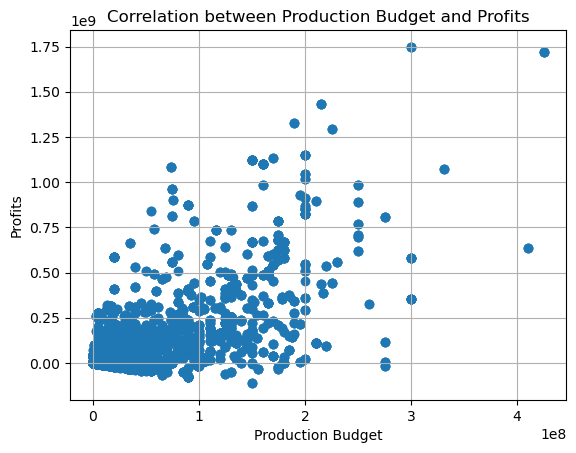

In [72]:
# Create a scatter plot
plt.scatter(Merged_df_2["production_budget"], Merged_df_2["profits"])
plt.xlabel('Production Budget')
plt.ylabel('Profits')
plt.title('Correlation between Production Budget and Profits')
plt.grid(True)
plt.show()


In [73]:
#correlation between runtime minutes and vote average
correlation_2 = Merged_df_2["runtime_minutes"].corr(Merged_df_2["vote_average"])
correlation_2


# There is a weak positive correlation between runtime_minutes and vote_average

0.19410331571541153

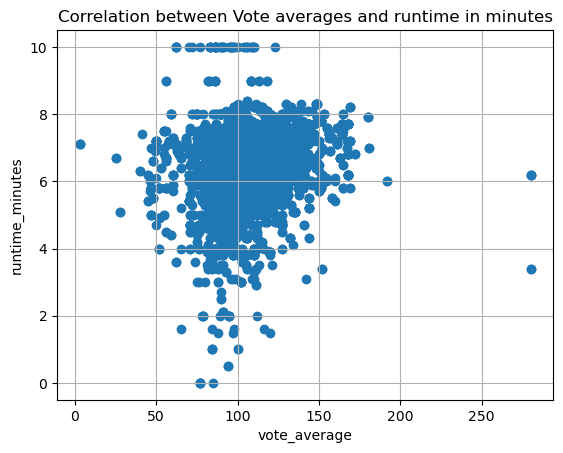

In [74]:
# Create a scatter plot
plt.scatter(Merged_df_2["runtime_minutes"], Merged_df_2["vote_average"])
plt.xlabel('vote_average')
plt.ylabel('runtime_minutes')
plt.title('Correlation between Vote averages and runtime in minutes')
plt.grid(True)
plt.show()

## Relationship between numerical columns and categorical columns

* 1. Profits by Genre: 

This will be useful to identify which genres tend to generate more profits.

In [75]:
#Profits by Genre
#Merged_df_2['profits'] = Merged_df_2['worldwide_gross'] - Merged_df_2['production_budget']
genre_profit_data = Merged_df_2.groupby('genre_name')['profits'].mean().sort_values(ascending=False)
genre_profit_data

genre_name
Animation          3.002649e+08
Family             2.465581e+08
Adventure          2.416767e+08
Fantasy            2.300481e+08
Science Fiction    1.641919e+08
Action             1.572987e+08
Comedy             9.180447e+07
War                8.815408e+07
Western            7.731822e+07
Romance            7.456034e+07
TV Movie           6.352768e+07
Crime              6.337377e+07
Thriller           6.133514e+07
Mystery            5.994147e+07
Music              5.838973e+07
Horror             5.447648e+07
Drama              5.148670e+07
Documentary        2.278172e+07
Historical         2.185845e+07
Name: profits, dtype: float64

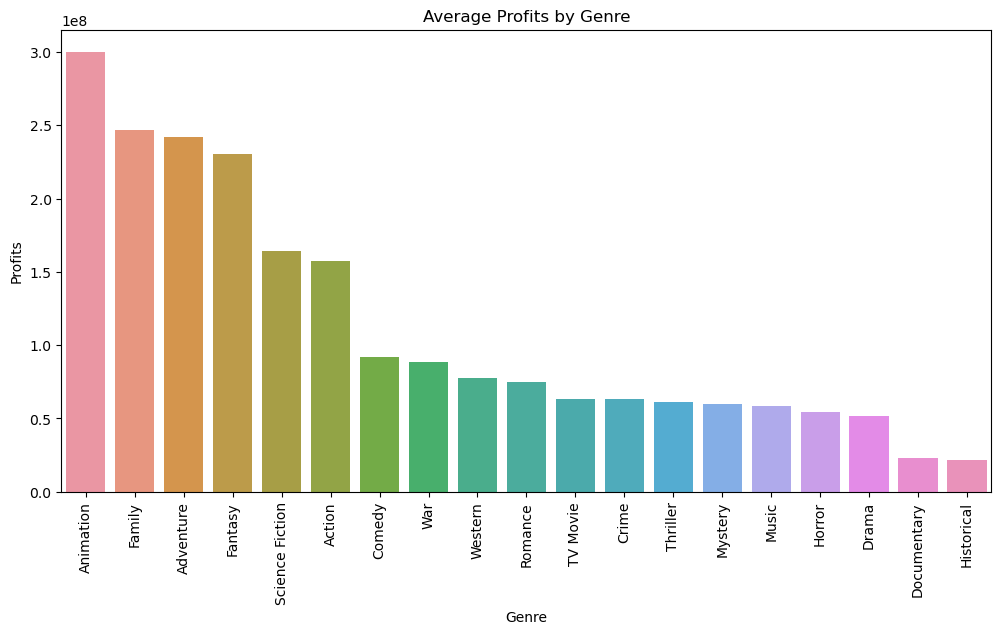

In [76]:
# Create a bar plot of genre_name vs. profits
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_profit_data.index, y=genre_profit_data.values)
plt.title('Average Profits by Genre')
plt.xlabel('Genre')
plt.ylabel('Profits')
plt.xticks(rotation=90)
plt.show()

* 2. Genre popularity 

This will be useful to identify the frequency and distribution of the genres and provise insights on preferences among the audience.

In [77]:
# Genre popularity
genre_counts = Merged_df_2['genre_name'].value_counts()
genre_counts

Drama              1275
Thriller            722
Comedy              705
Action              553
Adventure           391
Horror              375
Romance             314
Science Fiction     314
Crime               307
Fantasy             256
Family              243
Mystery             187
Animation           147
Documentary         118
Historical          108
War                  57
Music                57
Western              31
TV Movie              3
Name: genre_name, dtype: int64

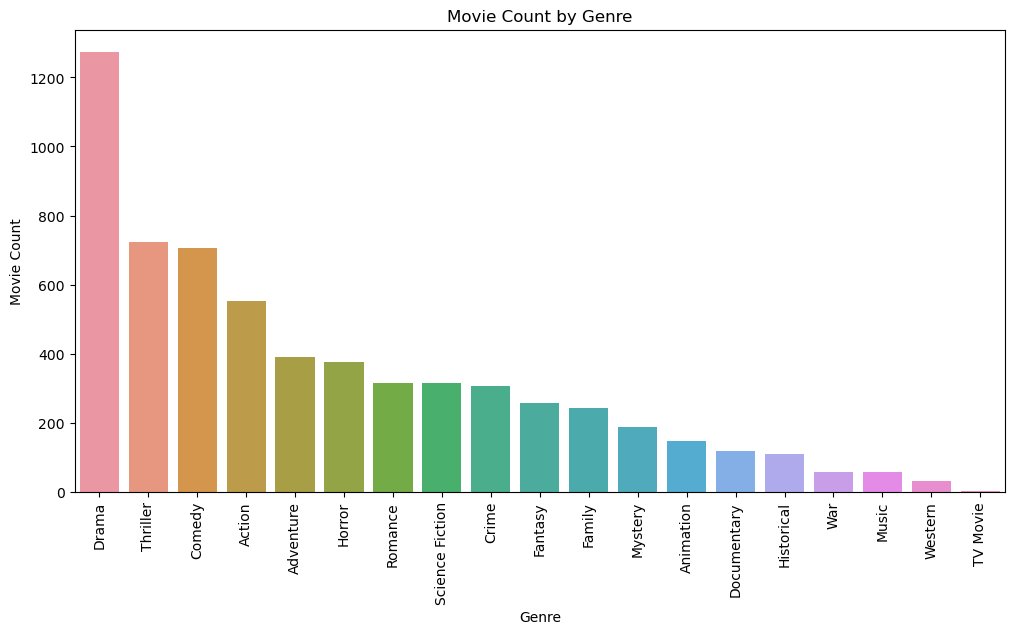

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Movie Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Movie Count')
plt.xticks(rotation=90)
plt.show()

* 3. Genre vs. Average Rating

This will be helpful to identify any relationship between genre and ratings; will be useful to know which genres are more popular among the audience.

In [79]:
# Genre vs. Average vote
genre_rating_data = Merged_df_2.groupby('genre_name')['vote_average'].mean().sort_values(ascending=False)
genre_rating_data

genre_name
Historical         7.033333
Documentary        6.672034
Animation          6.648980
Music              6.507018
War                6.505263
Drama              6.495294
Family             6.446914
Romance            6.425478
Adventure          6.393606
Fantasy            6.328906
Comedy             6.324113
Crime              6.242345
Mystery            6.166310
Action             6.149910
Science Fiction    6.119108
Thriller           5.979363
Western            5.712903
Horror             5.523733
TV Movie           4.466667
Name: vote_average, dtype: float64

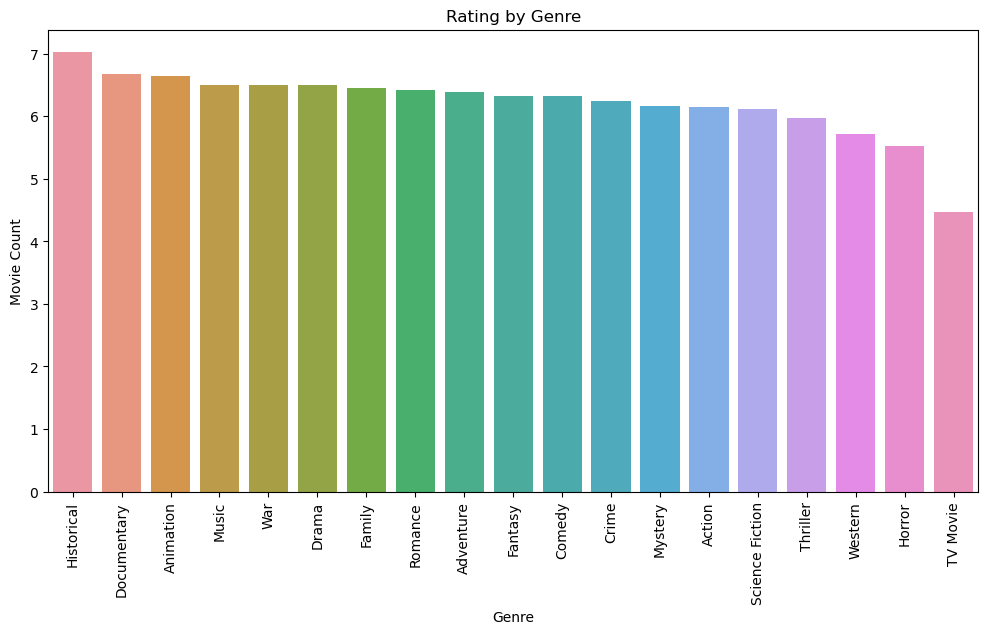

In [80]:
# plot a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_rating_data.index, y=genre_rating_data.values)
plt.title('Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Movie Count')
plt.xticks(rotation=90)
plt.show()


 * 4. Genre with low production and high profits
 
This will be useful to know which genres have low production costs and yield high profits

In [81]:
# Filter the dataframe to include only rows with positive profits
Merged_df_2_profitable = Merged_df_2[Merged_df_2['profits'] > 0]

In [82]:
# Group the data by genre_name and calculate the average production_budget and profits
Merged_df_2_genre_avg = Merged_df_2_profitable.groupby('genre_name').mean()[['production_budget', 'profits']].reset_index()

In [83]:
# Sort the data by profits in descending order
Merged_df_2_genre_avg = Merged_df_2_genre_avg.sort_values('profits', ascending=False)

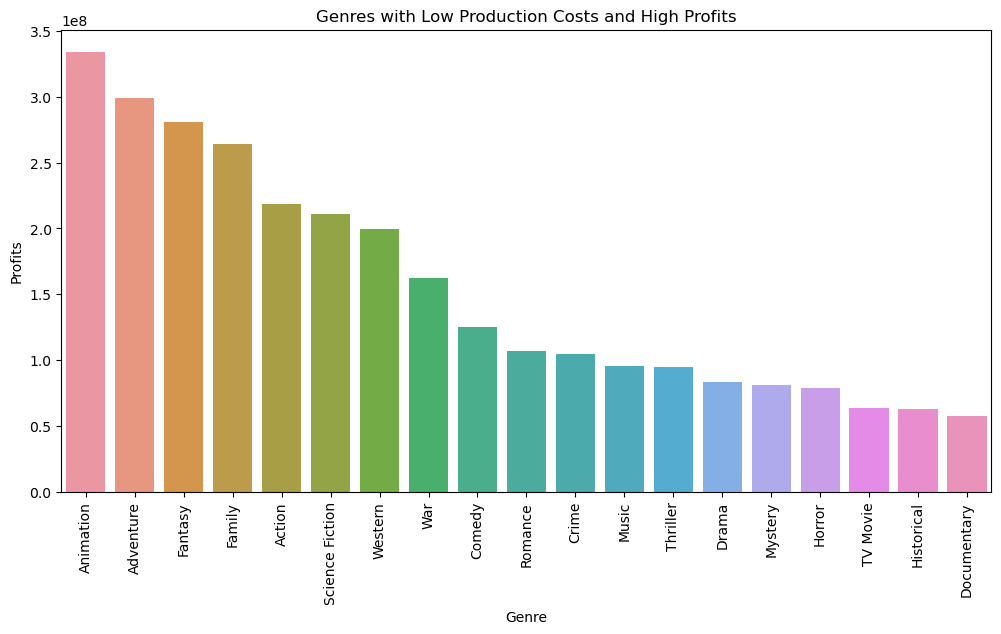

In [84]:
# Create a bar plot of genre_name vs. profits
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_name', y='profits', data=Merged_df_2_genre_avg)
plt.title('Genres with Low Production Costs and High Profits')
plt.xlabel('Genre')
plt.ylabel('Profits')
plt.xticks(rotation=90)
plt.show()

* 5. Average runtime of each genre

This will be useful to know the average runtime of each genre.

In [85]:
# Group the data by genre_name and calculate the average runtime
avg_runtime_by_genre = Merged_df_2_profitable.groupby('genre_name').mean()["runtime_minutes"].reset_index()
avg_runtime_by_genre

,genre_name,runtime_minutes
0,Action,112.650367
1,Adventure,111.065831
2,Animation,95.609023
3,Comedy,101.718045
4,Crime,110.517766
5,Documentary,96.036364
6,Drama,107.609988
7,Family,98.570175
8,Fantasy,107.735849
9,Historical,120.037037


In [86]:
# Sort the data by profits in descending order
avg_runtime_by_genre = avg_runtime_by_genre.sort_values('runtime_minutes', ascending=False)

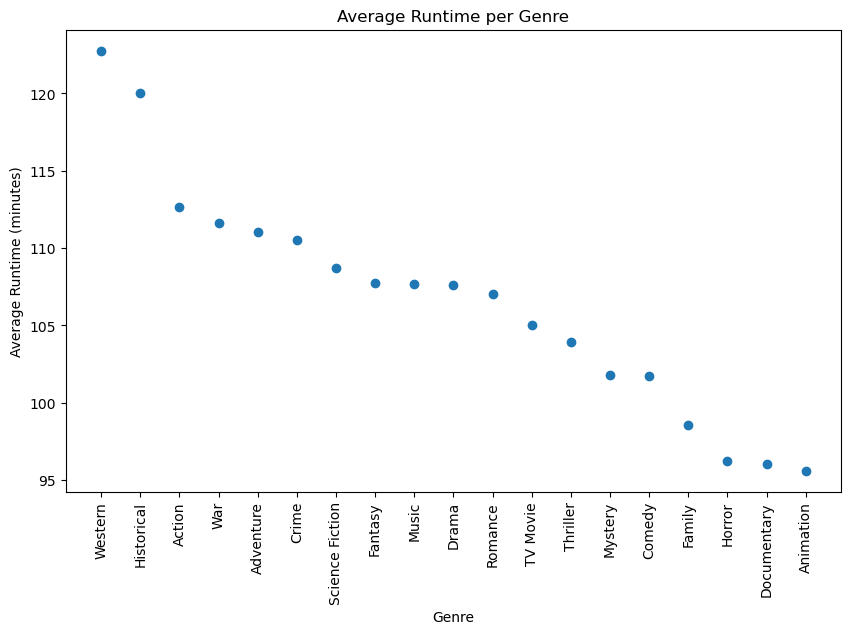

In [87]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_runtime_by_genre['genre_name'], avg_runtime_by_genre['runtime_minutes'])
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime per Genre')
plt.xticks(rotation=90)
plt.show()

* 6. Average time of movies with highest profits

This will be useful to know what run time is most profitable

In [88]:
# Filter movies with profits greater than 0
Merged_df_2_profitable = Merged_df_2[Merged_df_2['profits'] > 0]

In [89]:
# Calculate the average runtime of movies with high profits
average_runtime_high_profit_movies = Merged_df_2_profitable['runtime_minutes'].mean()
average_runtime_high_profit_movies

105.75432681501461

* 7. Average time of most popular movies

This will be useful to know what run time is most popular

In [90]:
# Filter movies with profits greater than 0
Merged_df_2 = Merged_df_2.sort_values(by='numvotes', ascending=False)

In [91]:
# Select top 200 movies based on number of votes
top_voted = Merged_df_2.head(200)
top_voted

,movie_id,original_title,movie,start_year,runtime_minutes,genres,averagerating,numvotes,genre_ids,id_x,...,title,vote_average,vote_count,genre_name,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,profits
2308,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,28,27205,...,Inception,8.3,22186,Action,38,"Jul 16, 2010",160000000,292576195,835524642,675524642
2310,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,12,27205,...,Inception,8.3,22186,Adventure,38,"Jul 16, 2010",160000000,292576195,835524642,675524642
2309,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,878,27205,...,Inception,8.3,22186,Science Fiction,38,"Jul 16, 2010",160000000,292576195,835524642,675524642
2180,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0,53,49026,...,The Dark Knight Rises,7.7,13933,Thriller,11,"Jul 20, 2012",275000000,448139099,1084439099,809439099
2179,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0,18,49026,...,The Dark Knight Rises,7.7,13933,Drama,11,"Jul 20, 2012",275000000,448139099,1084439099,809439099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,16,86841,...,Black Panther,5.1,11,Animation,42,"Feb 16, 2018",200000000,700059566,1348258224,1148258224
4584,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,12,284054,...,Black Panther,7.4,12365,Adventure,42,"Feb 16, 2018",200000000,700059566,1348258224,1148258224
4585,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,14,284054,...,Black Panther,7.4,12365,Fantasy,42,"Feb 16, 2018",200000000,700059566,1348258224,1148258224
4586,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,878,284054,...,Black Panther,7.4,12365,Science Fiction,42,"Feb 16, 2018",200000000,700059566,1348258224,1148258224


In [92]:
# Calculate the average runtime of the top N movies
average_runtime_top_movies = top_voted['runtime_minutes'].mean()
average_runtime_top_movies

130.415

* 8. Most popular language

In [93]:
# Group the data by language
profitable_lang = Merged_df_2.groupby('original_language')[['production_budget', 'worldwide_gross']].sum()

In [94]:
# Calculate the total profit for each language
profitable_lang['total_profit'] = profitable_lang['worldwide_gross'] - profitable_lang['production_budget']

In [95]:
# Sort the languages by total profit in descending order
profitable_lang = profitable_lang.sort_values('total_profit', ascending=False)
profitable_lang.head(5)

,production_budget,worldwide_gross,total_profit
original_language,,,
en,2.931518e+11,9.354579e+11,6.423061e+11
te,6.000000e+07,5.270058e+08,4.670058e+08
th,1.200000e+08,4.889908e+08,3.689908e+08
hi,4.101000e+08,6.770314e+08,2.669314e+08
fr,6.306000e+08,7.886538e+08,1.580538e+08


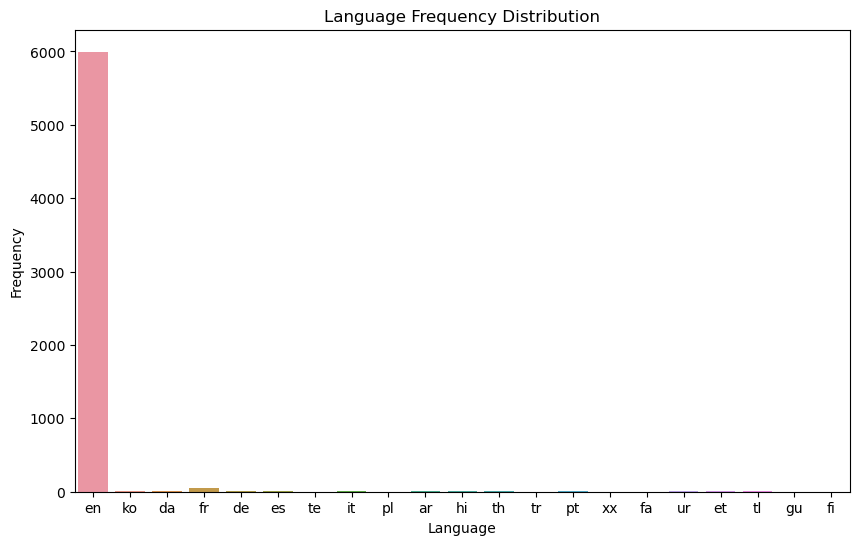

In [96]:
# Create a bar chart of language frequency distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="original_language", data=Merged_df_2)
plt.title("Language Frequency Distribution")
plt.xlabel("Language")
plt.ylabel("Frequency")
plt.show()

## CONCLUSIONS

* Movies with higher budgets have shown a corresponding increase in the revenues;
* The genres Animation, Family, Adventure and Fantasy have the highest profits;
* Top 4 most produced genres are Drama, Thriller, Action and Adventure;
* Top 4 genres with the highest average ratings are Historical, Documentaries, Animation and Music;
* The genres Animation, Adventure, Fantasy and Family are the top genres with low production costs but with high profits;
* The average runtime for the most profitable movies is 105 minutes.
* The most popular language with highest profits is English.

## RECOMMENDATIONS

1. Microsoft Movie Studios should produce movies that cut across the Animation, Adventure, Family and Fantasy so as to optimise profits as they are the most profitable genres, they are also the genres with low production costs and high profits.

2. Microsoft Movie Studios should produce the movies in English as it's the most popular language in the box office and have the highest profits; they can traslate them to France, Hindi to capture top international markets.

3. Microsft Movie Studios films should have an average runtime of 105 minutes as this is the most common time among the top earning movies.